In [17]:
! pip install matplotlib

You should consider upgrading via the '/Users/naveenmalla/Documents/Projects/Kaggle-Projects/venv/bin/python3.9 -m pip install --upgrade pip' command.


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib


In [25]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")
# see the first five rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# do one hot encoding for the categorical variables Sex 
train_data["Sex"] = pd.get_dummies(train_data["Sex"], drop_first=True)
test_data["Sex"] = pd.get_dummies(test_data["Sex"], drop_first=True)
print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name    Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris   True  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  False  38.0      1   
2                             Heikkinen, Miss. Laina  False  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  False  35.0      1   
4                           Allen, Mr. William Henry   True  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
   Passe

Pclass      0
Age       177
Sex         0
SibSp       0
Parch       0
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

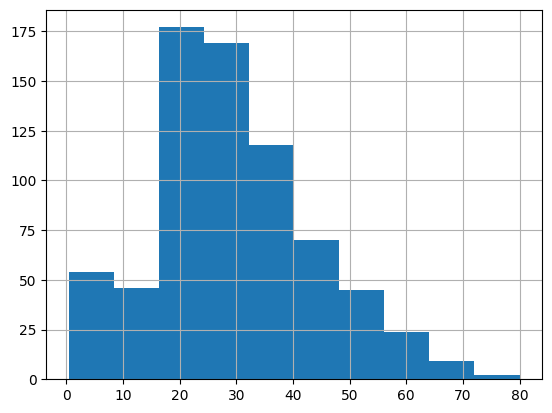

In [22]:
# determine the distribution of the age column
x["Age"].hist()

In [33]:
# split the train.csv data further into age_train and age_predict based on if age value is present or not
age_train = train_data[train_data["Age"].notnull()]
age_predict = train_data[train_data["Age"].isnull()]

# create age_x and age_y for the age_train data by including Survived info in training the model
age_y = age_train["Age"]
age_x = age_train[["Pclass", "Survived", "Sex", "SibSp", "Parch"]]

print(age_x.head())
print(age_y.head())


   Pclass  Survived    Sex  SibSp  Parch
0       3         0   True      1      0
1       1         1  False      1      0
2       3         1  False      0      0
3       1         1  False      1      0
4       3         0   True      0      0
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [41]:
# build a regression model usingage_x and age_y data
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(age_x, age_y)

# predict the missing age values using in age_predict data
age_predict["Age"] = reg.predict(age_predict[["Pclass", "Survived", "Sex", "SibSp", "Parch"]])

# check if there are any null values in age_predict
print(age_predict.isnull().sum(), '\n')

# combine the age_train and age_predict data
x = pd.concat([age_train, age_predict])
y = x["Survived"]
x = x[["Pclass", "Age", "Sex", "SibSp", "Parch"]]

print(x.head(), '\n')
print(y.head(), '\n')



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          158
Embarked         0
dtype: int64 

   Pclass   Age    Sex  SibSp  Parch
0       3  22.0   True      1      0
1       1  38.0  False      1      0
2       3  26.0  False      0      0
3       1  35.0  False      1      0
4       3  35.0   True      0      0 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64 



/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_57759/1394793696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_predict["Age"] = reg.predict(age_predict[["Pclass", "Survived", "Sex", "SibSp", "Parch"]])


In [43]:
# fill the missing values with the mean of age because the distribution seems normal 
# x["Age"].fillna(x["Age"].mean(), inplace=True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
# check for missing values
# print(x.isnull().sum(), "\n")
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_57759/2526174432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)


In [44]:
# fit a model on x using random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x, y)

RandomForestClassifier()

In [45]:
# get predictions
predictions = random_forest.predict(test_data[["Pclass", "Age", "Sex", "SibSp", "Parch"]])
# create a dataframe with the passenger id and the predictions
submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": predictions})
print(submission.head())
# save the dataframe to a csv file
submission.to_csv("Data/submission.csv", index=False)


   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         1
